<h1 align="center">Visualization with Seaborn </h1> 
## Program so far
- Python Basics
- Python Programming Constructs
- Data Structures
- Functions
- Object Oriented Programming in Python
- NumPy
- Pandas


## What are we going to learn today ?
***
- Data Visualization
- Various Libraries for data visualization
- Distribution Plots
- Scatter Plot
- Box Plot
- factor plot
- violin plot
- count plot
- swarm plot
- Bar plot

![](../images/image84.jpg)

<img src="../images/icon/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

## Two packages we use throughout the notebook 

***

- Matplotlib: 2D plotting library that allows you to create publication-quality figures
- Seaborn: Another complimentary package that is based on this data visualization library is Seaborn, which provides a   high-level interface to draw statistical graphics.


-------------


## Matplotlib vs Seaborn

![](../images/matplot.png)
Seaborn is complimentary to Matplotlib and it specifically targets statistical data visualization. But it goes even further than that: Seaborn extends Matplotlib and that’s why it can address the two biggest frustrations of working with Matplotlib.

### Advantages of Seaborn


- Creating complex statistical plots in a few lines of code
- Better Aesthetics and Built-In Plots
- Nicer Default Aesthetics
- Easily Customizable Aesthetics
- Statistically-Minded Plots

### Disadvantages of Seaborn
- The main disadvantage of seaborn is that it is **slow in execution**. 
- Interpretting certain plots in seaborn could be cumbersome


In the following codes we will go through the advantages starting with the number of lines of code required to produce the plots. 



## John ka Ghar

So John decides to buy a house and is curious to know how what factors should he take into account to do so. 
Being a curious personality he tries to gather data and get his hands dirty with exploring housing prices. Lets see where this takes him !!!



In [1]:
# Importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

In [2]:
data= pd.read_csv('../data/train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


He observes that several features are correlated with sales price. Understanding this he proceeds to plot the correlation for all the numerical data in the dataset

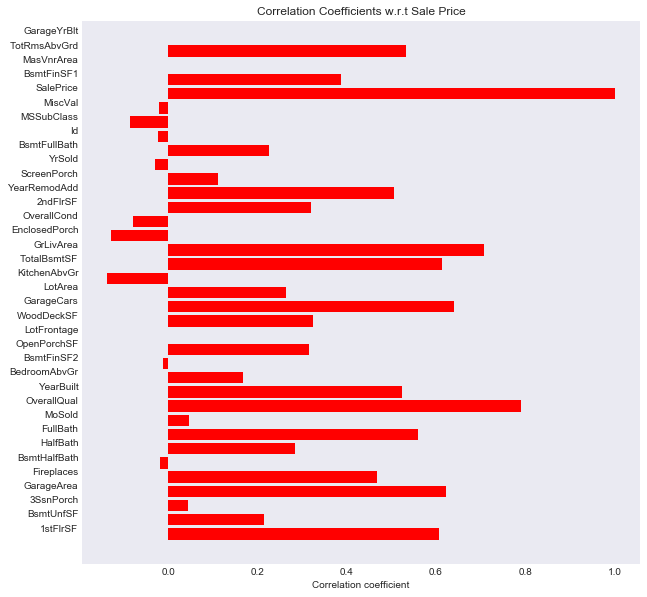

In [4]:
#plotting correlations
num_feat=list(set(data._get_numeric_data())) ## Get a list of columns for numerical data
num_feat=num_feat[1:-1] #Leave Out Sale Price
labels = [] ## Create array to store the labels
values = [] ## Create an array to store the values of the correlation computed.
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(data[col].values, data.SalePrice.values)[0,1]) ## Compute the correlation of feataures 
    # with Sale Price
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(10,10)) ## Handling figures
rects = ax.barh(ind, np.array(values), color='red') ## Plotting the horizontal Bar Graph
# Beautifying the plots
ax.set_yticks(ind+((width)/2.)) 
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");



<img src="../images/icon/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
### Technical point
***
In the above cell we see that the amount of lines of code that is required to get a barplot is extensive and below we look at how simple things get while using seaborn.


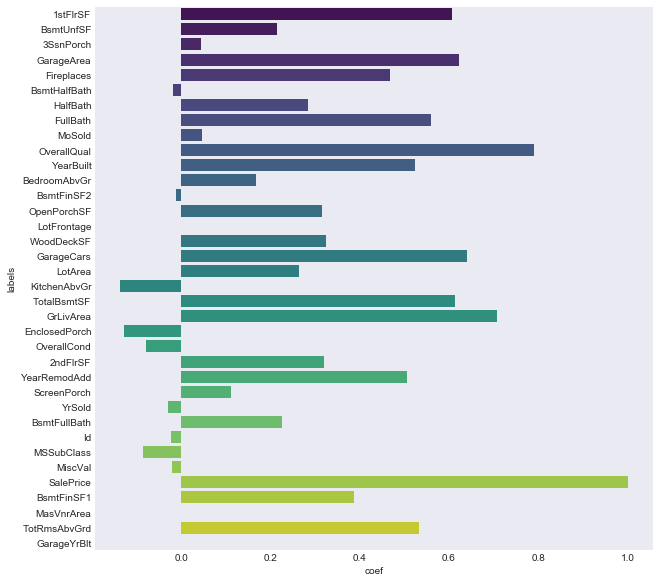

In [5]:
df = pd.DataFrame({'labels': labels, 'coef':values}) ## Create a data frame with labels and values
plt.figure(figsize=(10,10)) # Set Figure Size
sns.barplot(x='coef',y='labels',data = df,palette='viridis') ## make the bar plot using seaborn

### Distribution plots

John digs deep into the data set to figure the distribution of housing prices. Wanting a house relatively new he also takes a look at the year in which they were built. He explores these in detail. He explores them with a distribution plot which enables him to infer how the housing prices along with the Year in which they were built are distributed. 

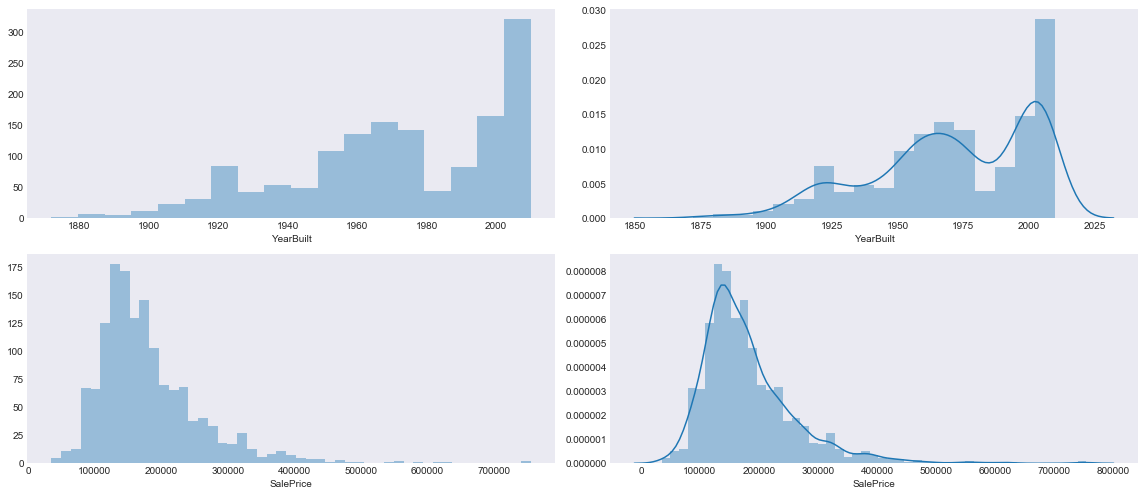

In [6]:
plt.figure(figsize=(16,7)) # setting figure attributes
plt.subplot(221)
sns.distplot(data['YearBuilt'],kde=False)
plt.subplot(222)
sns.distplot(data['YearBuilt'])
plt.subplot(223)
sns.distplot(data['SalePrice'],kde=False)
plt.subplot(224)
sns.distplot(data['SalePrice'])
plt.tight_layout()

He heaves a sigh of relief after finding that the houses prices are distributed about $150,000 and also notices that there is an increment in construction of houses in recent years. After being satisfied with the initial results he digs a little deeper and is curious to know if the Neighbourhood affects the price of the Houses. 

**Note**

The lines that you see in the plots on the right hand side are called [Kernel Density Estimation Plots](https://en.wikipedia.org/wiki/Kernel_density_estimation). 


## Swarm plot

He tries his hand at a newly learnt tool which is the swarm plot. This plot is used to draw a categorical scatterplot with non-overlapping points. He tries to find out which is the most suitable neighbourhood that will allow him to purchase a house in his allocated budget. 


Text(0,0.5,'Sale Price')

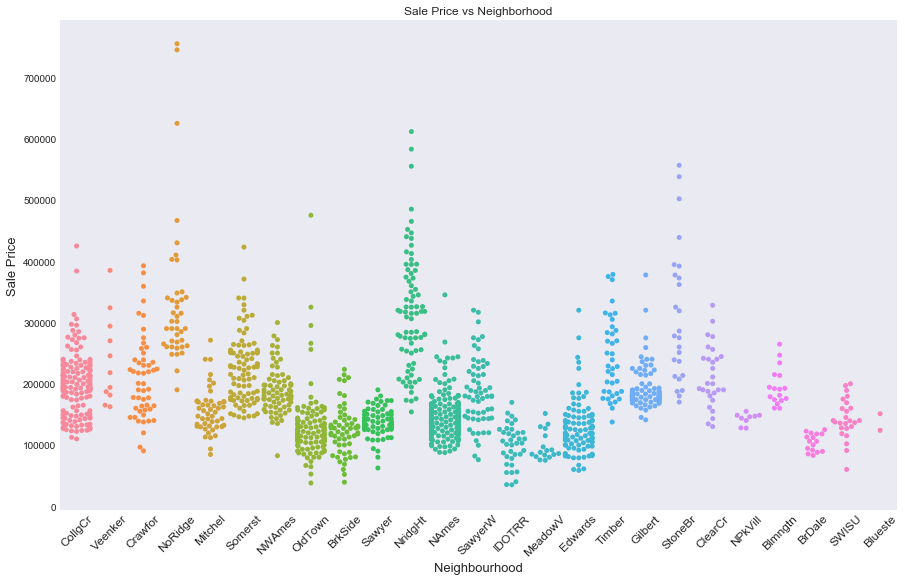

In [7]:
plt.figure(figsize=(15,9))
plt.xticks(rotation=45,fontsize=12) 

sns.swarmplot("Neighborhood","SalePrice",data=data)
plt.title("Sale Price vs Neighborhood");
plt.xlabel('Neighbourhood',fontsize=13)
plt.ylabel('Sale Price', fontsize=13)

John discovers that there are multiple neighbourhoods where he could afford a place to settle in. He short lists a few of them such as `CollgCr` , `NAmes`, `Edwards` etc. Now he is curious to know if the age of the construction affects the price. He thus does a little feature engineering to compute the age of the construction. 



## Scatter Plot

John then uses another tool from his bag which is **scatter plot**. This plot gives a good visual picture of the relationship between the two variables, and aids the interpretation of the correlation coefficient or regression model.

Text(0,0.5,'Sale Price')

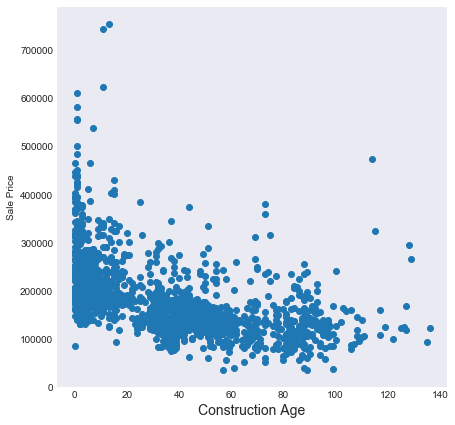

In [8]:
data['Construction_Age'] = data['YrSold']- data['YearBuilt'] ### Computing age of the construction
plt.figure(figsize=(7,7))
plt.scatter(data['Construction_Age'],data['SalePrice'])
plt.xlabel('Construction Age',fontsize=14)
plt.ylabel('Sale Price')

He is not very surprised with the results. But obvious as the age of the construction increases the cost goes down. Now he is more convinced to invest in the newer houses.

## Box Plot

John suddenly realizes he has not considered that weather plays an important role in his choices as he does not want to die of cold or be burnt down by the sun. He uses boxplot this time which is a method for graphically depicting groups of numerical data through their quartiles. 

------
**Note**
In descriptive statistics, the [quartiles](https://en.wikipedia.org/wiki/Quartile) of a ranked set of data values are the three points that divide the data set into four equal groups, each group comprising a quarter of the data. 



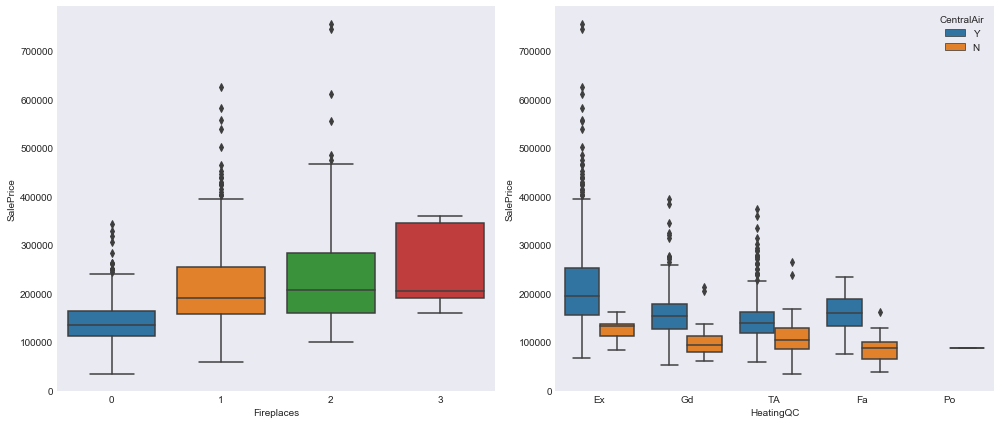

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.boxplot('Fireplaces','SalePrice',data=data)
plt.subplot(122)
sns.boxplot(x="HeatingQC", y="SalePrice",data=data,hue='CentralAir')

plt.tight_layout()


So being bemused by the results which can be inferred as houses having the facility of fireplaces are much expensive and falls out the allocated budget. He now starts to panic about his **ghar ka sapna** .

## Count plot 

Still worried, he now looks at the zone which has the most number of houses.

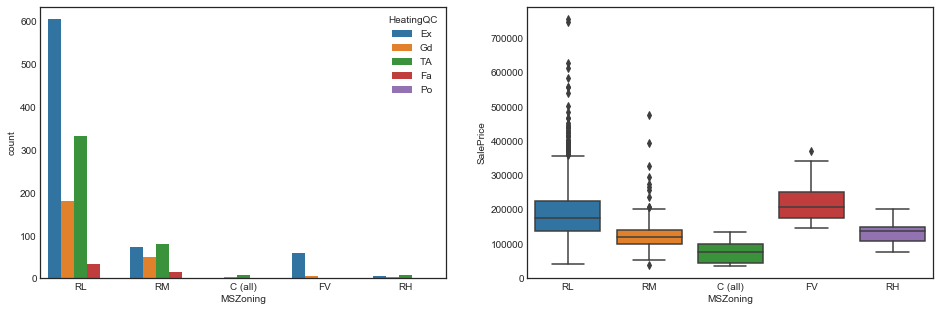

In [10]:
with sns.axes_style("white"): ### Changing the background of the plots
    plt.figure(figsize=(16,5))
    plt.subplot(121)
    sns.countplot('MSZoning',data=data,hue='HeatingQC')
    plt.subplot(122)
    sns.boxplot(x="MSZoning", y="SalePrice",data=data)

He determines that the houses in residential low density areas have average heating facility and seems to be  affordable. This gives him back his **ghar ka sapna**

## Violin Plot

The violin plot is similar to box plots, except that they also show the probability density of the data at different values (in the simplest case this could be a histogram)[Violin Plots](https://en.wikipedia.org/wiki/Violin_plot). 

- Violin plots will include a marker for the median of the data
- A box indicating the interquartile range, as in standard box plots. 
- Overlaid on this box plot is a kernel density estimation. Like box plots, violin plots are used to represent comparison of a variable distribution (or sample distribution) across different "categories". 

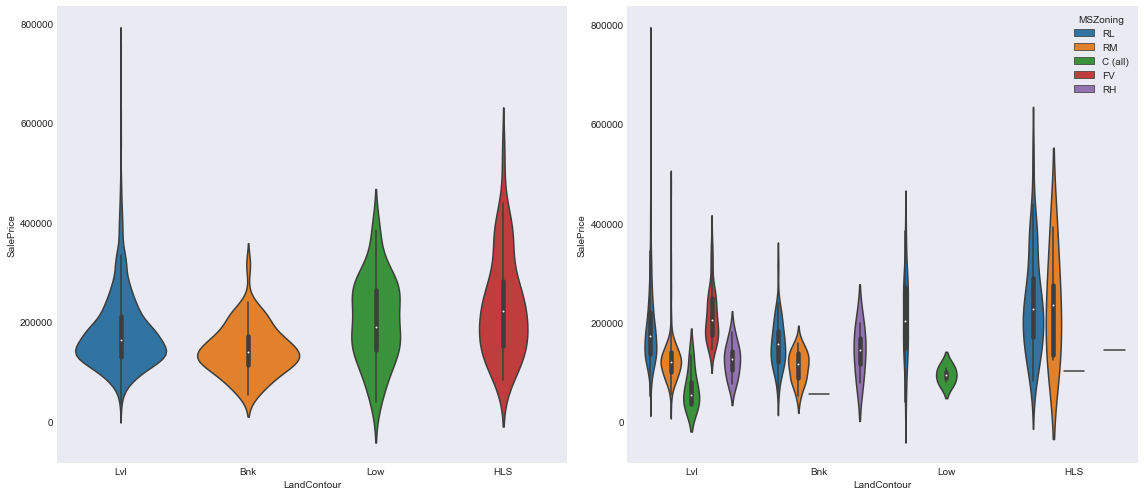

In [11]:
plt.figure(figsize=(16,7))
plt.subplot(121)
sns.violinplot('LandContour','SalePrice',data=data)
plt.subplot(122)
sns.violinplot('LandContour','SalePrice',data=data,hue='MSZoning')
plt.tight_layout()

By visualing the violin plots he is convinced of the fact that in banked contours of the residential low density area 
the houses are affordable.

## Bar plot

While purchasing a house strength of house used is determined by the type of material used in its foundation which indeed was on the check list that john is looking for.

------
**Note**

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a line graph.

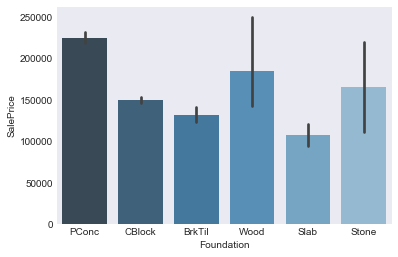

In [12]:
sns.barplot("Foundation","SalePrice",data=data,palette="Blues_d")

He is pretty much confused if he should go with the available choices which in this case are Cinder Block, Slab and Brick and Tile kind of foundation.

Finally he decides to get a overview of of the data on its whole and also in parts. Lets see where he goes. 
 
___
**Correlation**

Correlation is any of a broad class of statistical relationships involving dependence, though in common usage it most often refers to how close two variables are to having a linear relationship with each other. It is computed as 

<center>$\large\large\frac{cov(X,Y)}{\sigma_x\sigma_y}$</center> 



He begins with a correlation plots by plotting in a heat map style which basically is a graphical representation of data where the individual values contained in a matrix are represented as colors.

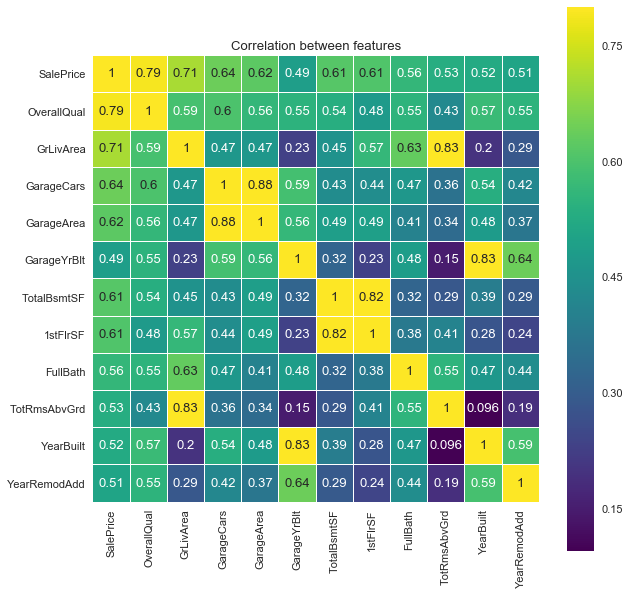

In [13]:
corrMatrix=data[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

Further he proceeds to look at how the Quality of the House affects the price. He now employs another tool from his bag the joint plot. This plot not only lets us visualize the relation but also gives us the distribution of the features. These can be seen below. 

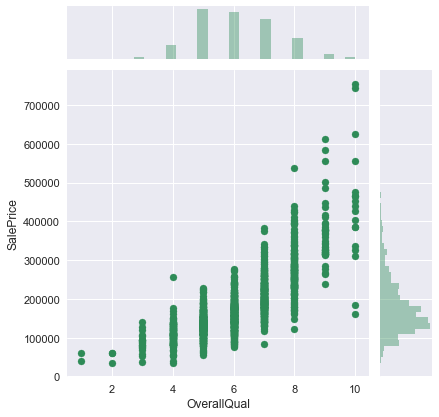

In [14]:
sns.jointplot('OverallQual','SalePrice',data,kind='scatter',color='seagreen',stat_func=None)

Now john clearly observes that the Overall Quality is segmented and has 10 different segments. Also, he notices that as the quality increases the price of the houses increase.

## Pair Grid

Being convinced with all the results above he finally turns to get a overall relationship between `SalePrice`,  `OverallQual`, `GrLivArea`, `GarageCars`,  `GarageArea`, `GarageYrBlt`, `TotalBsmtSF` and employes the perfect tool pair grid for plotting pairwise relationships in the interested features.

/Users/abhisheksubramanian/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


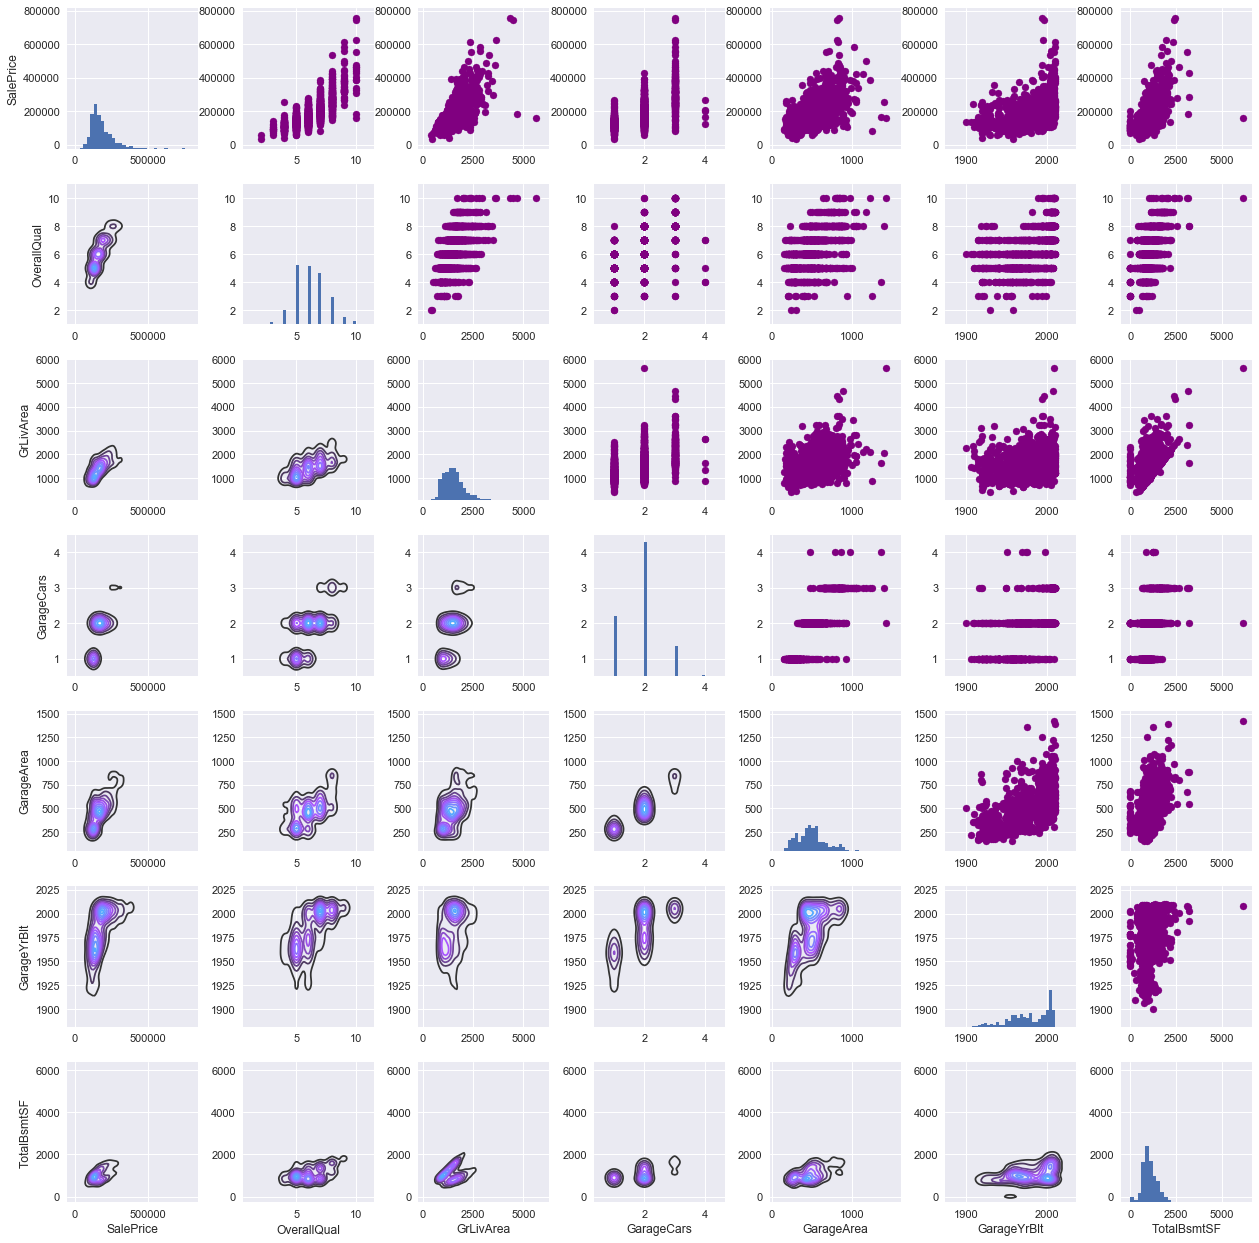

In [15]:
features = data[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF"]]
fig = sns.PairGrid(features.dropna())
fig.map_upper(plt.scatter,color='purple')
fig.map_lower(sns.kdeplot,cmap= 'cool_d')
fig.map_diag(plt.hist,bins=30)

## Further reading

- [Seaborn](https://seaborn.pydata.org/)
- [An interesting visualization](https://github.com/philippbayer/Goodreads_visualization/blob/master/README.ipynb)

<img src="../images/icon/Recap.png" alt="In Session Recap" style="width: 100px;float:left; margin-right:15px"/>

## In session Recap

- Data Visualization
- Various Libraries for data visualization
- Distribution Plots
- Scatter Plot
- Box Plot
- factor plot
- violin plot
- count plot
- swarm plot
- Bar plot
----------------

## Thank You

For more queries - Reach out to academics@greyatom.com

## Next Session: Intro to ML & Descriptive Stats